In [51]:
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
import csv

In [52]:
def plotbar(x, y):
    plt.bar(x, y, align='center', alpha=0.5)
    plt.ylabel('Usage')
    plt.title('Programming language usage')

    plt.show()
    
def plot(x, y, peptideID, plotLabel, plotTitle):
    plt.figure(figsize=(20,10))
    plt.plot(x, y, label=plotLabel)
    plt.xlabel('mass')
    plt.ylabel('intensity')
    plt.title(plotTitle)
    plt.legend()
    
    plt.savefig("{}.png".format(plotLabel), dpi=100)
    
    plt.show()
    


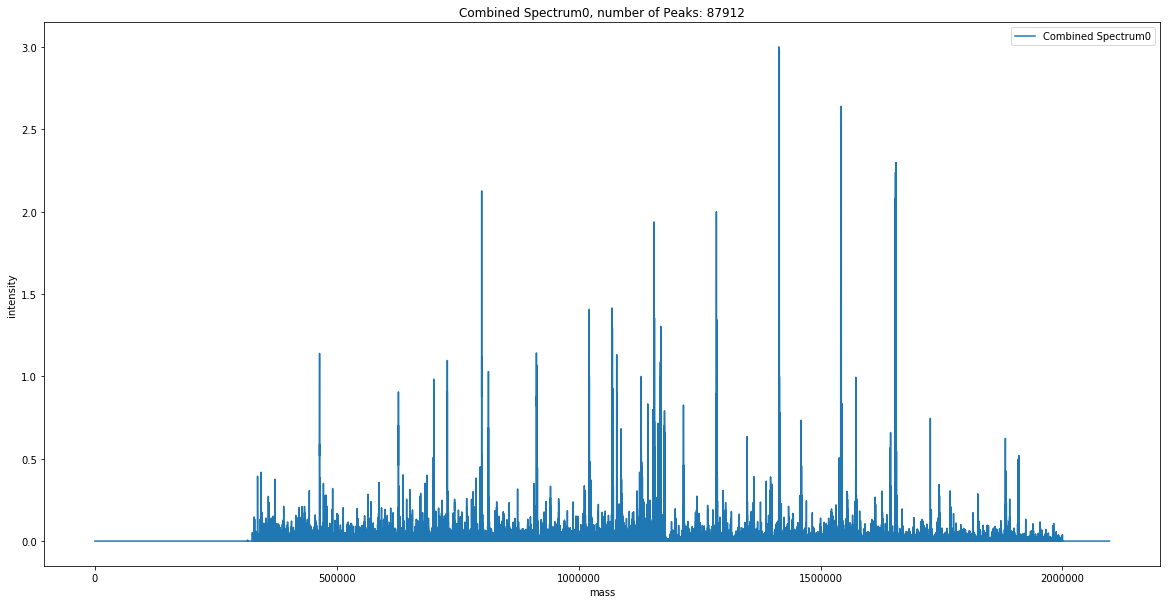

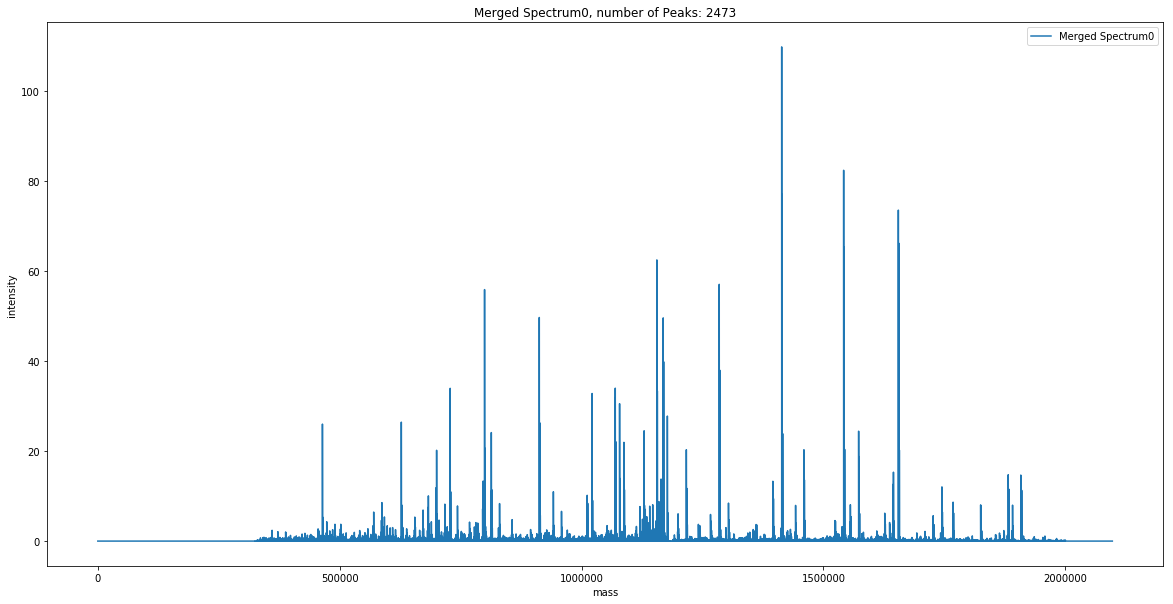

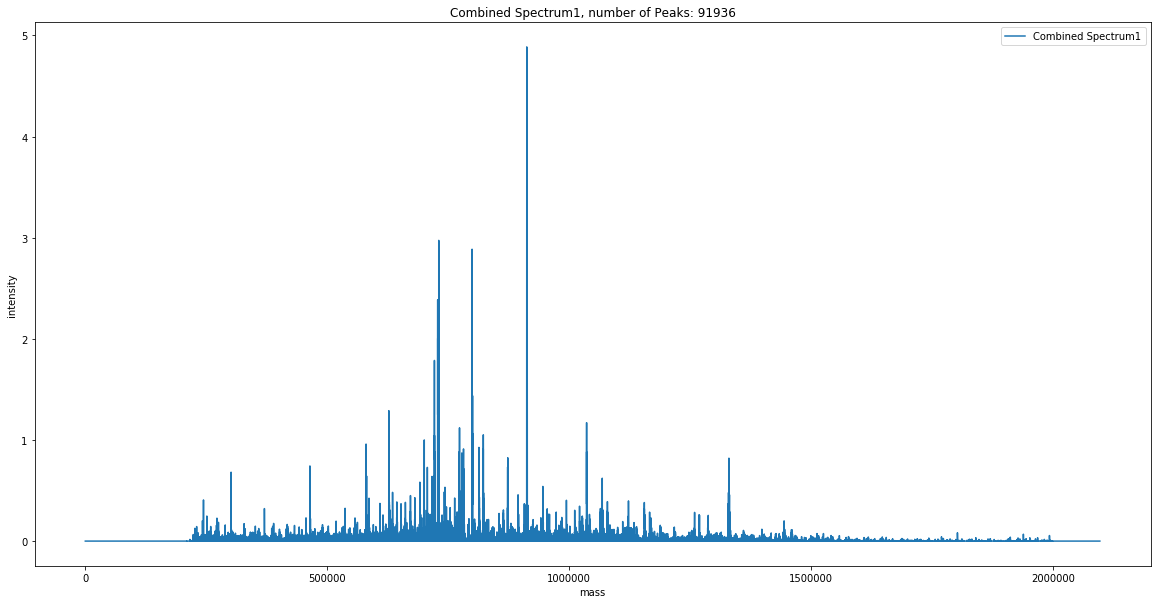

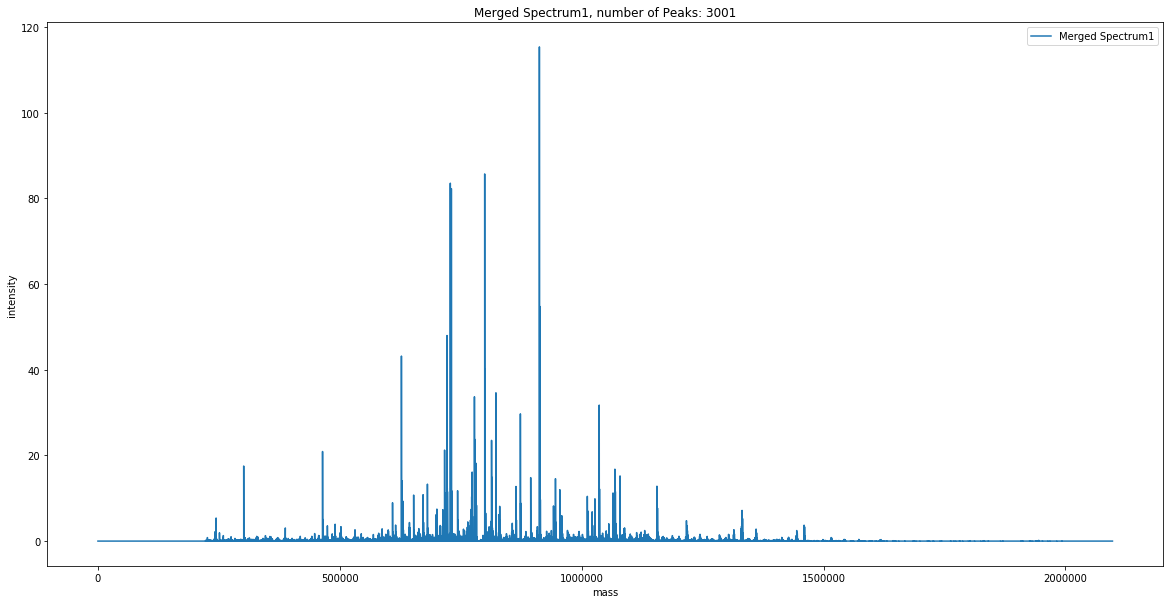

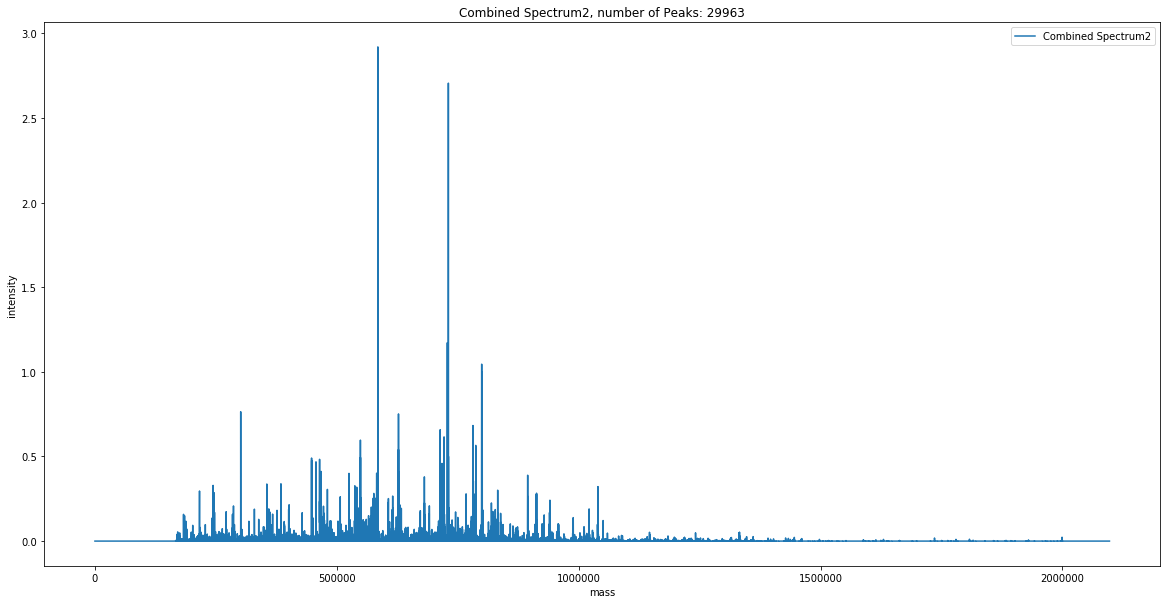

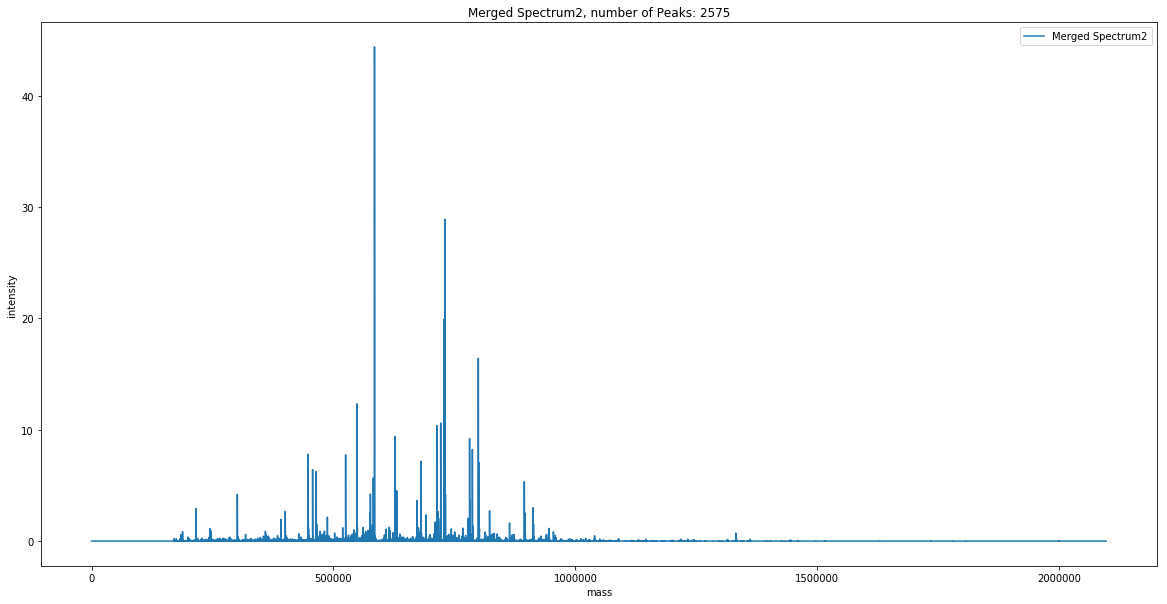

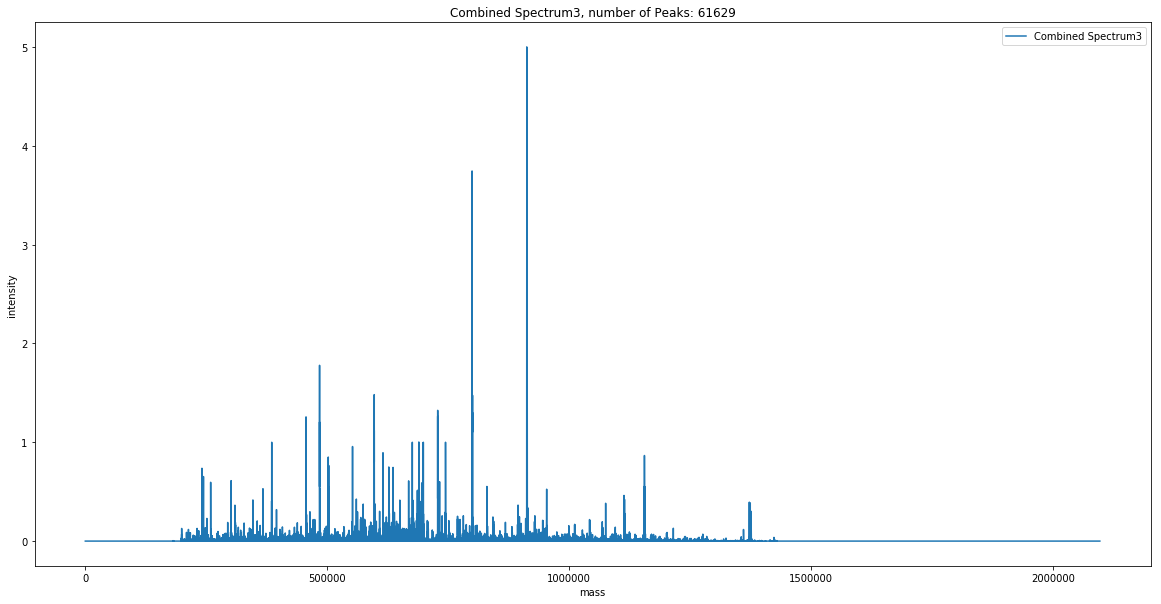

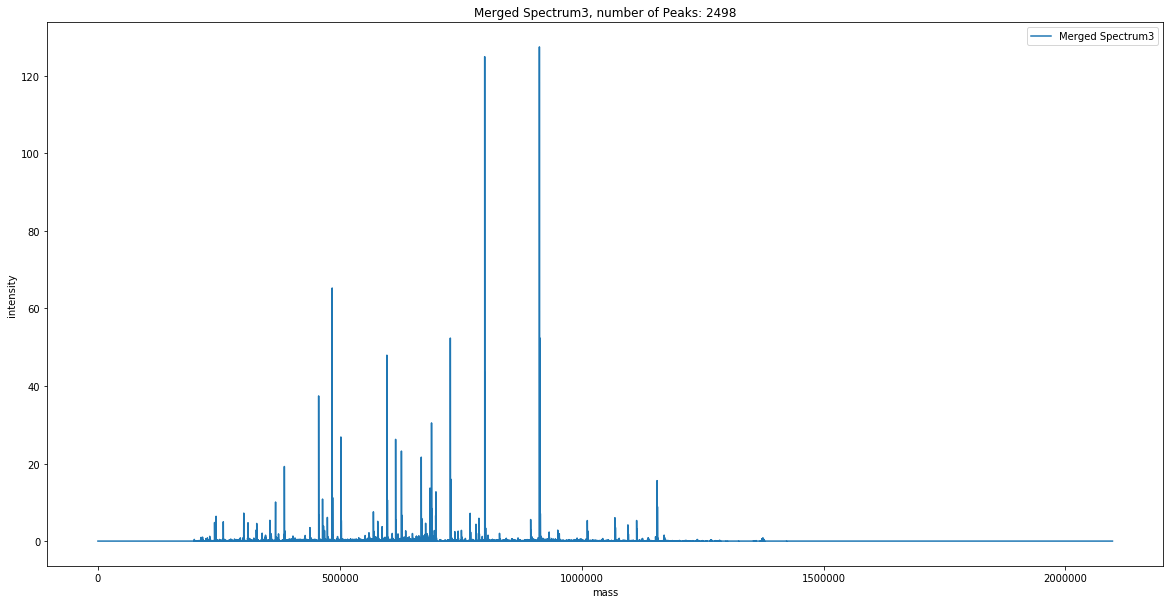

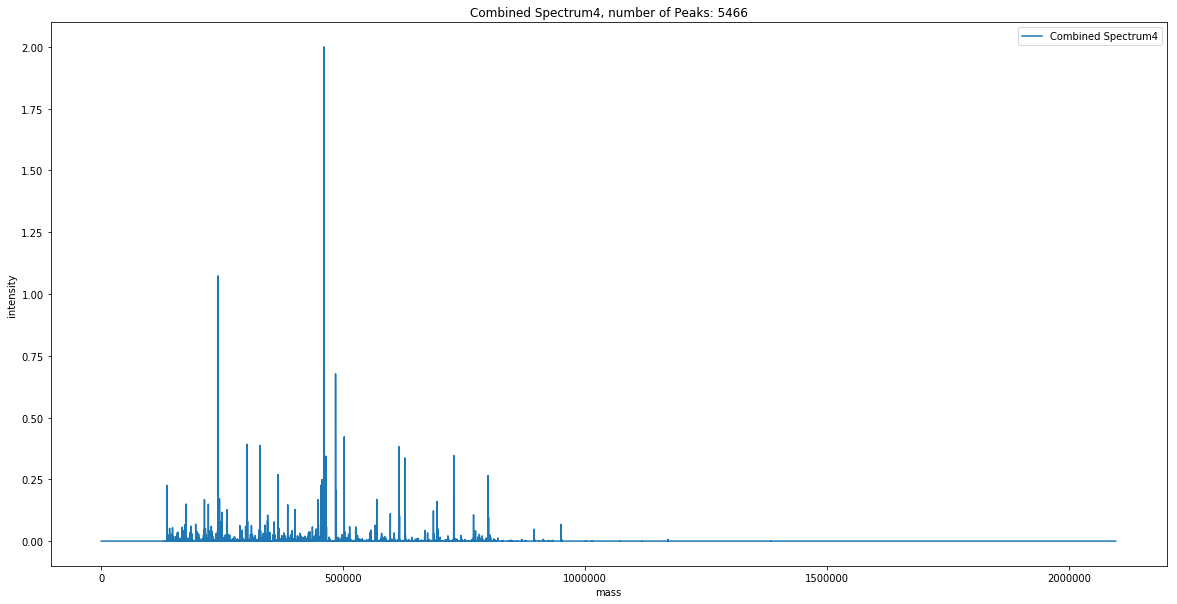

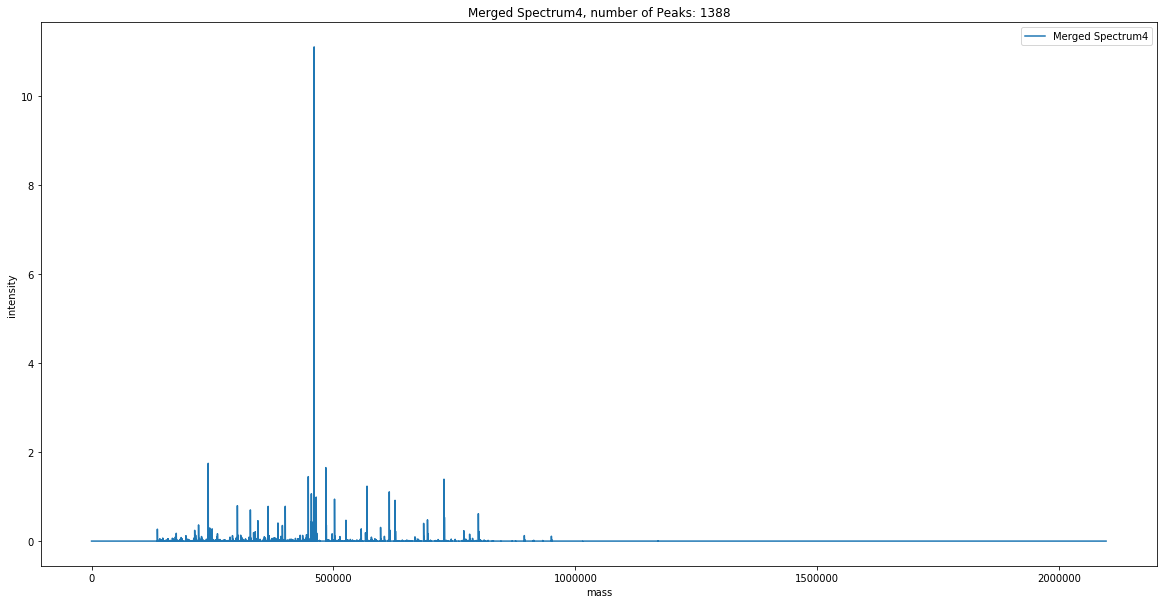

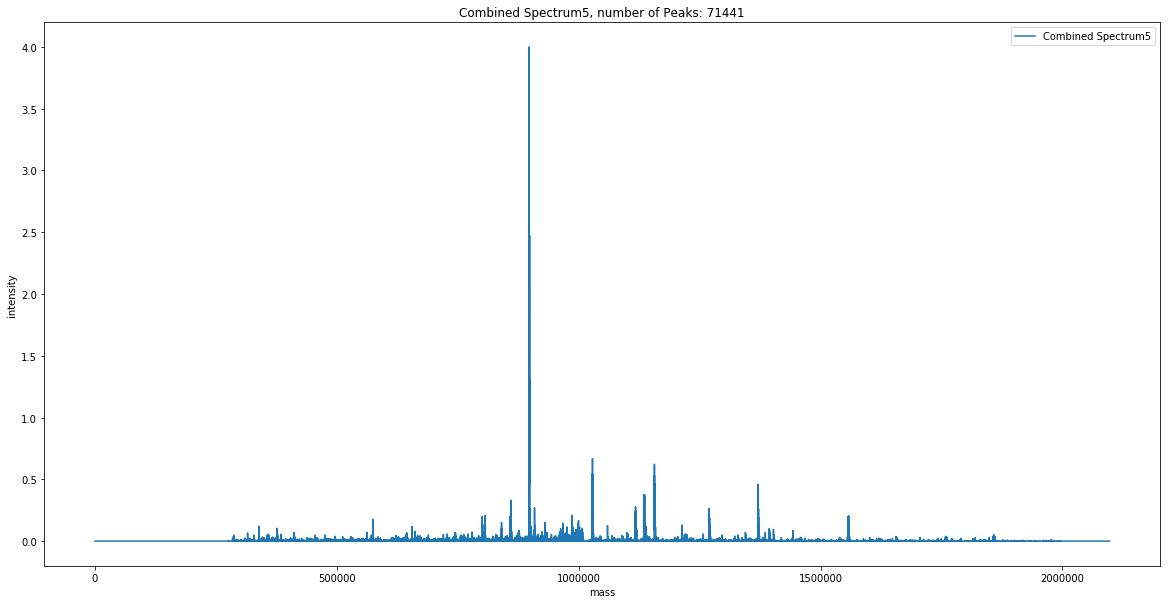

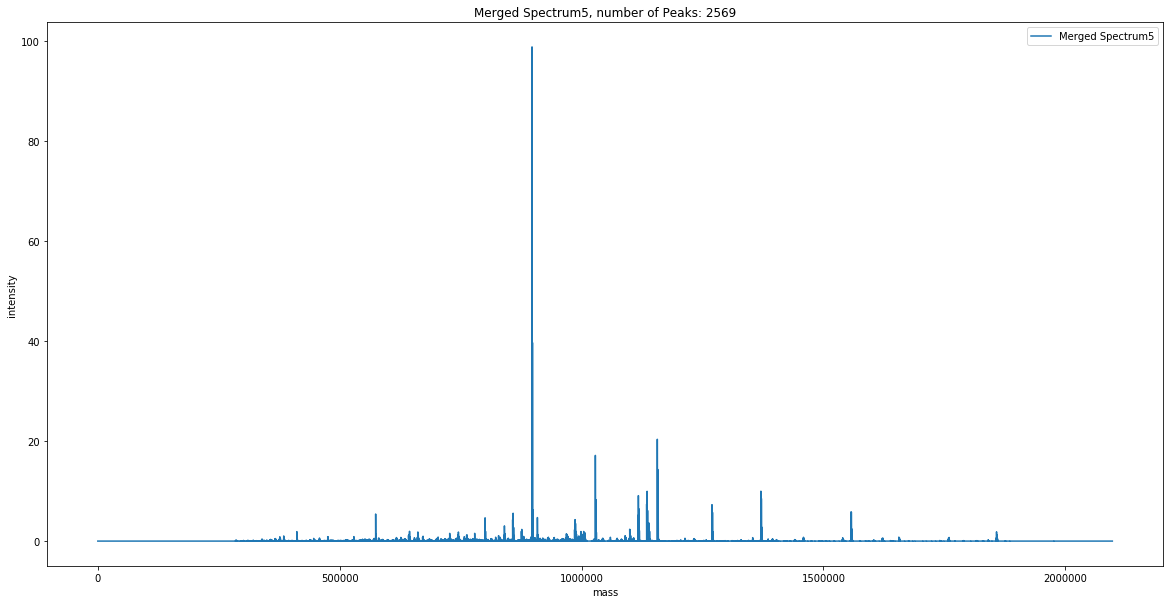

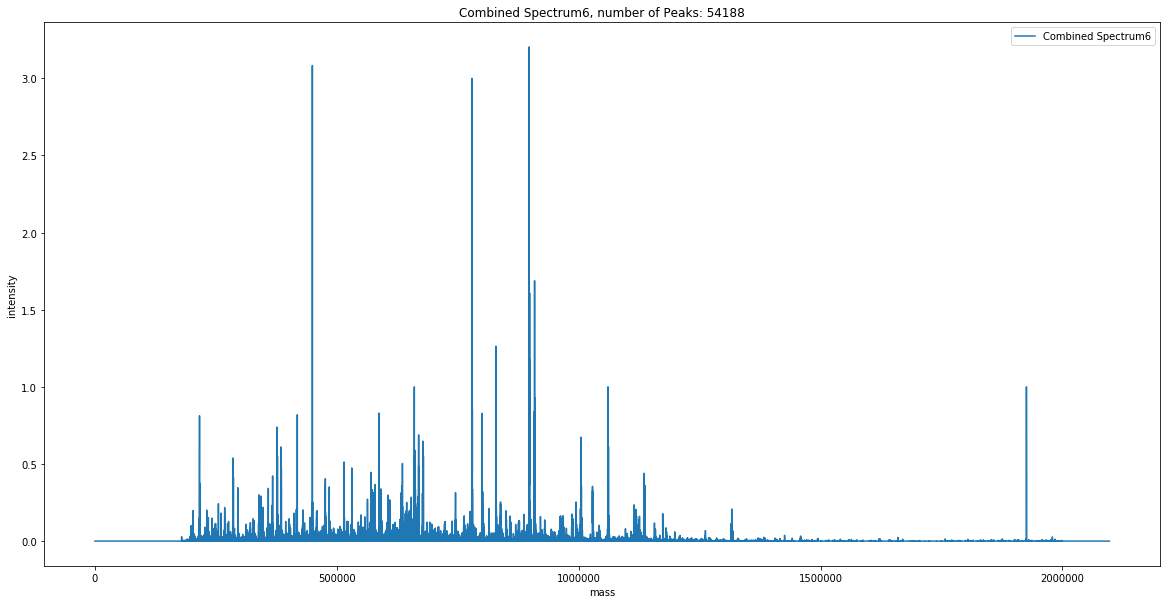

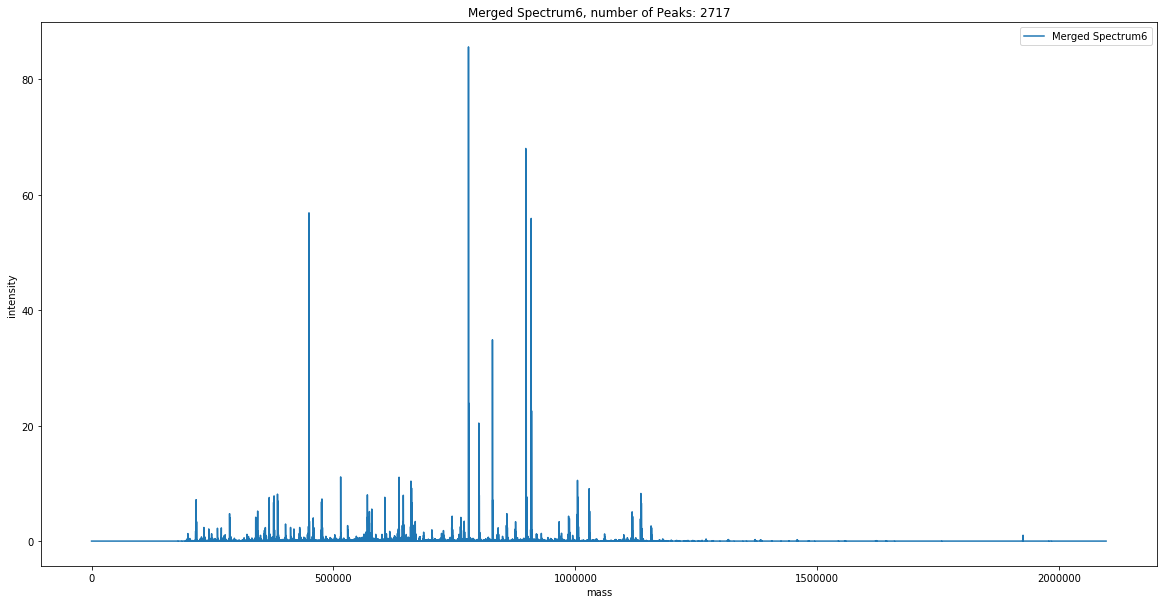

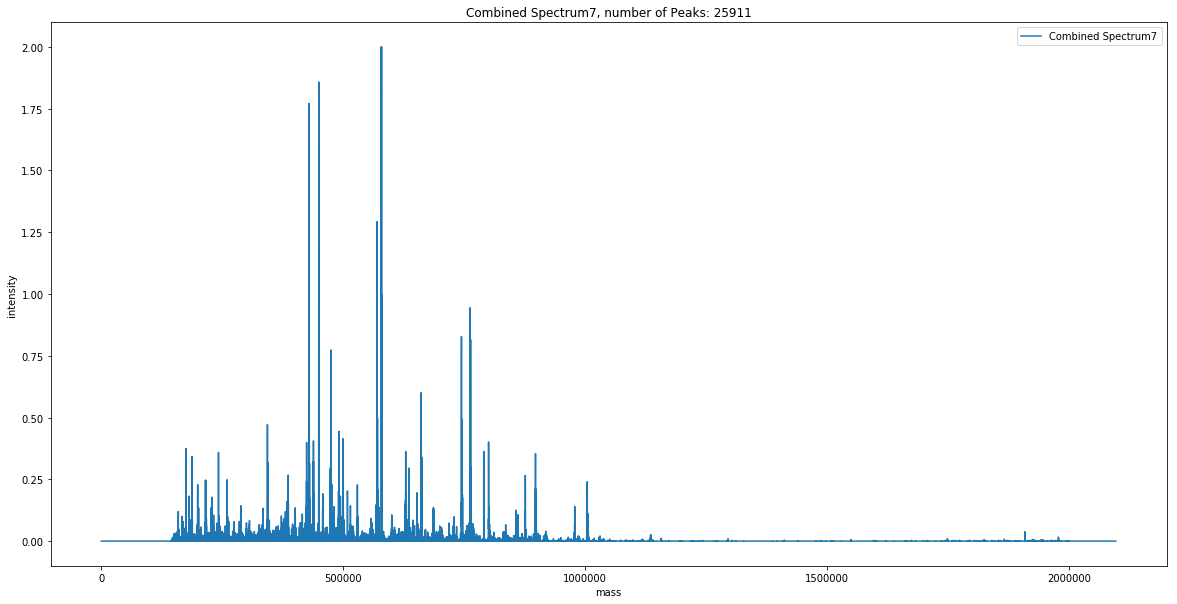

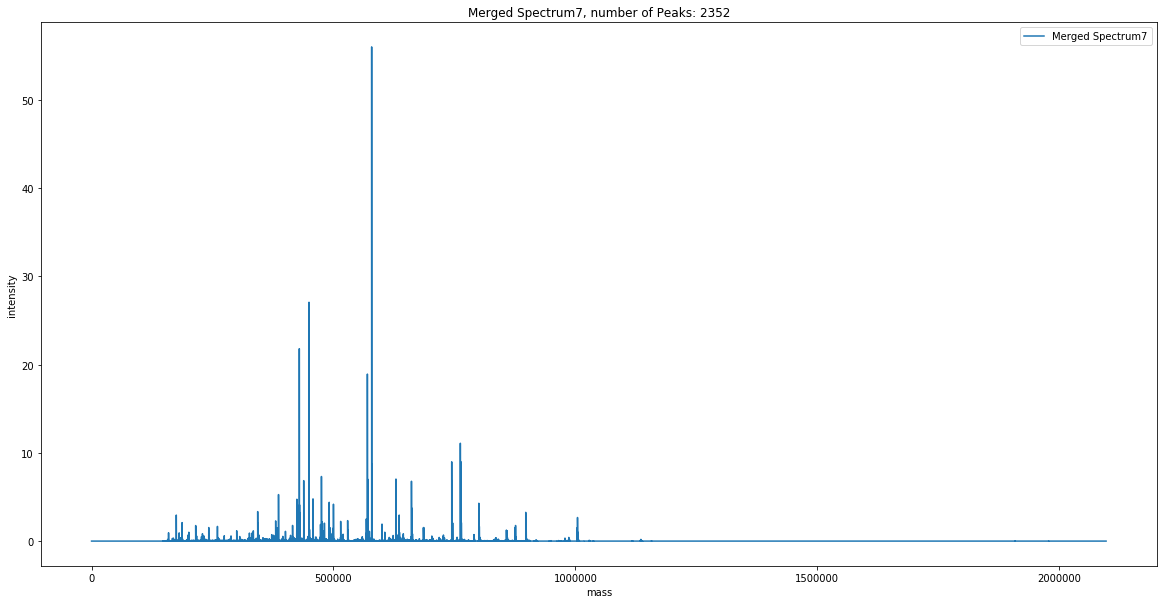

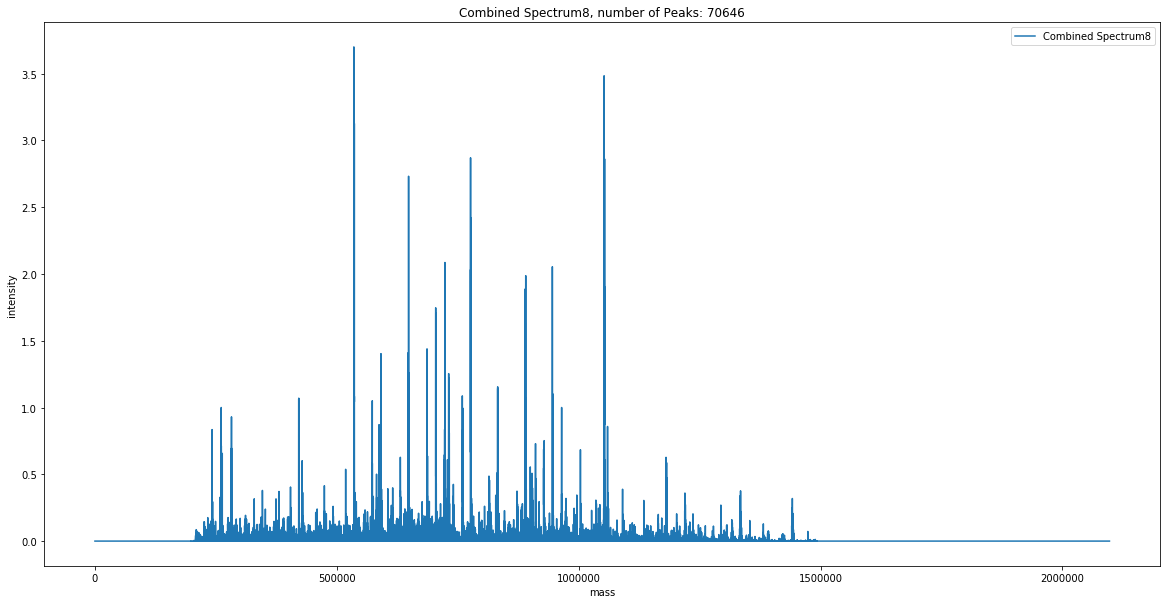

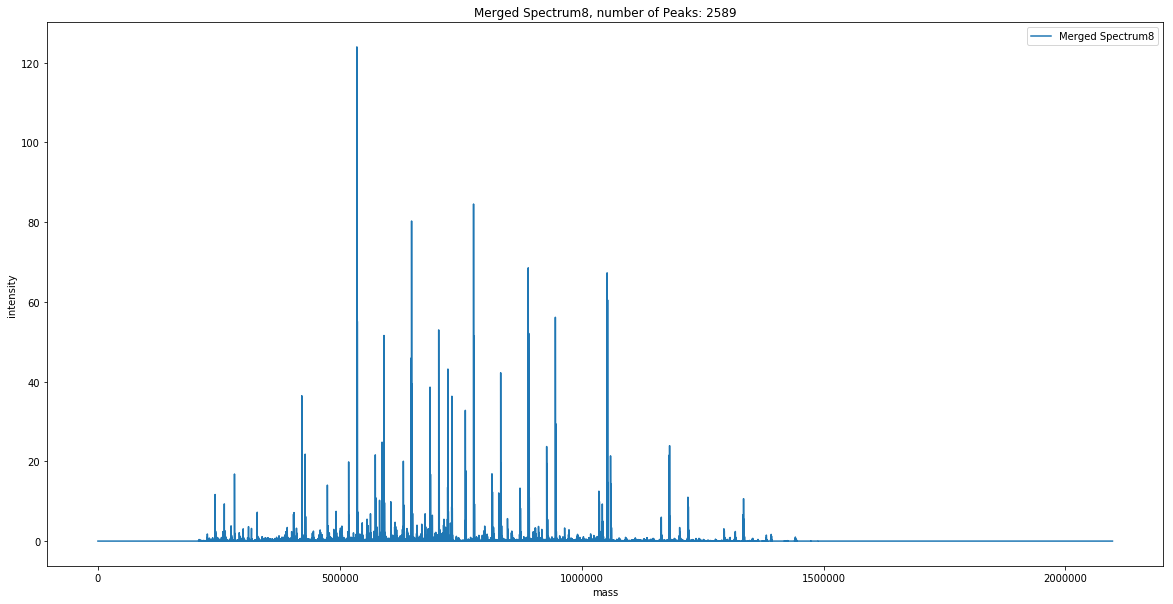

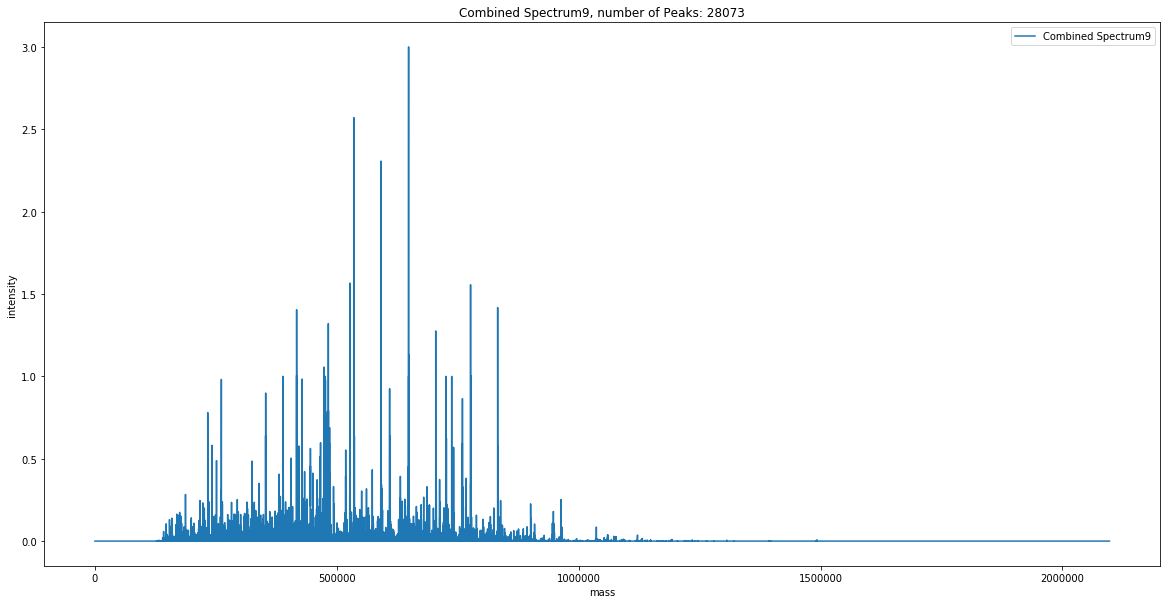

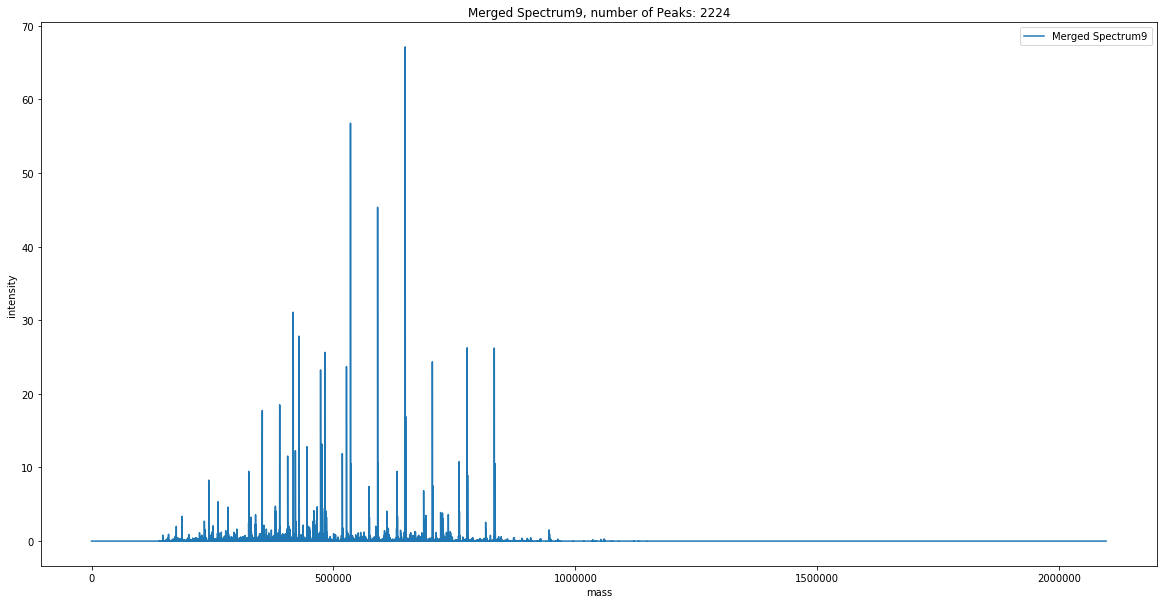

In [55]:
for i in range(10):
    fileNameCombined = '../outputCSV/CombinedSpectrum/Spectrum[{}].csv'.format(i)
    fileNameMerged = '../outputCSV/MergedSpectrum/Spectrum[{}].csv'.format(i)

    with open(fileNameCombined,'r') as csvfile:
        plots = csv.reader(csvfile, delimiter=',')

        intensity = []
        mass = []
        
        massIndex = 0
        
        for row in plots:

            mass.append(massIndex)
            intensity.append(float(row[0]))
            
            massIndex = massIndex + 1
            
        label = "Combined Spectrum{}".format(i)
        title = "Combined Spectrum{}, number of Peaks: {}".format(i, np.count_nonzero(intensity))
                        
        plot(mass, intensity, i, label, title)
                
    with open(fileNameMerged,'r') as csvfile:
        plots = csv.reader(csvfile, delimiter=',')

        intensity = []
        mass = []
        
        massIndex = 0
        
        for row in plots:

            mass.append(massIndex)
            intensity.append(float(row[0]))
            
            massIndex = massIndex + 1
                        
        label = "Merged Spectrum{}".format(i)
        title = "Merged Spectrum{}, number of Peaks: {}".format(i, np.count_nonzero(intensity))
        plot(mass, intensity, i, label, title)

        #plotbar(mass[0:1000], intensity[0:1000])